# Basic Probability

## Random Experiments

### Sampling With and Without Replacement

In [24]:
# Listing 2.4: Fishing with and without replacement
using StatsBase, Plots ; pyplot()

Plots.PyPlotBackend()

In [25]:
function proportionFished(gF, sF, n, N, withReplacement = false)
    function fishing()
        fishInPond = [ones(Int64, gF); zeros(Int64, sF)]
        fishCaught = Int64[]

        for fish in 1:n
            fished = rand(fishInPond)
            push!(fishCaught, fished)
            if withReplacement == false
                deleteat!(fishInPond, findfirst(x->x==fished, fishInPond))
            end
        end
        sum(fishCaught)
    end

    simulations = [fishing() for _ in 1:N]
    proportions = counts(simulations, 0:n)/N
    
    if withReplacement
        plot!(0:n, proportions,
            line=:stem, marker=:circle, c=:blue, ms=6, msw=0,
            label="With replacement",
            xlabel="n",
            ylims=(0, 0.6), ylabel="Probability")
    else
        plot!(0:n, proportions,
            line=:stem, marker=:xcross, c=:red, ms=6, msw=0,
            label="Without replacement")
    end
end

proportionFished (generic function with 2 methods)

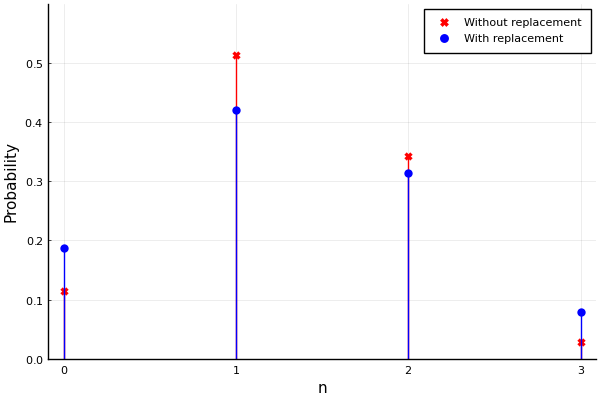

In [26]:
N = 10^6
goldFish, silverFish, n = 3, 4, 3
proportionFished(goldFish, silverFish, n, 3)
plot()
proportionFished(goldFish, silverFish, n, N)
proportionFished(goldFish, silverFish, n, N, true)

### Lattice paths

In [27]:
# Listing 2.5: Lattice paths
using Random, Combinatorics, Plots, LaTeXStrings; pyplot()
Random.seed!(12)

MersenneTwister(UInt32[0x0000000c], Random.DSFMT.DSFMT_state(Int32[589013436, 1072892337, 1395473285, 1073017187, -346481041, 1072887813, 23263411, 1072776800, -1379277159, 1073038715  …  -173461052, 1072708370, 859747322, 1072998707, -624312252, -2047062377, 1852138555, -1338826024, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000

In [28]:
n, N = 5, 10^5

(5, 100000)

In [29]:
function isUpperLattice(v)
    for i in 1:Int(length(v)/2)
        sum(v[1:2*i-1]) >= i ? continue : return false
    end
    return true
end

isUpperLattice (generic function with 1 method)

In [30]:
omega = unique(permutations([zeros(Int, n);ones(Int, n)]))
A = omega[isUpperLattice.(omega)]
pA_modelI = length(A)/length(omega)

0.16666666666666666

In [31]:
function randomWalkPath(n)
    x, y = 0, 0
    path = []
    while x<n && y<n
        if rand() < 0.5
            x += 1
            push!(path,0)
        else
            y += 1
            push!(path,1)
        end
    end
    append!(path, x<n ? zeros(Int64,n-x) : ones(Int64,n-y))
    return path
end

randomWalkPath (generic function with 1 method)

In [32]:
pA_modelIIest = sum([isUpperLattice(randomWalkPath(n)) for _ in 1:N]) / n

4899.4

In [33]:
println("Model I: ",pA_modelI, "\t Model II: ", pA_modelIIest)

Model I: 0.16666666666666666	 Model II: 4899.4


In [34]:
function plotPath(v, l, c)
    x, y = 0, 0
    graphX, graphY = [x], [y]
    for i in v
        if i == 0
            x += 1
        else
            y += 1
        end
        push!(graphX, x), push!(graphY,y)
    end
    plot!(graphX, graphY,
        la=0.8, lw=2, label=l, c=c, ratio=:equal, legend=:topleft,
        xlims=(0,n), ylims=(0,n),
        xlabel=L"East\rightarrow", ylabel=L"North\rightarrow")
end     

plotPath (generic function with 1 method)

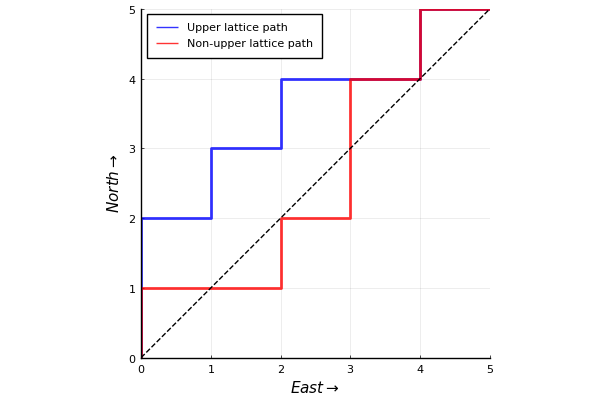

In [35]:
plot()
plotPath(rand(A), "Upper lattice path", :blue)
plotPath(rand(setdiff(omega,A)), "Non-upper lattice path", :red)
plot!([0, n], [0,n], ls=:dash, c=:black, label="")